In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

## Exploring Category Column

In [5]:
df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [6]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

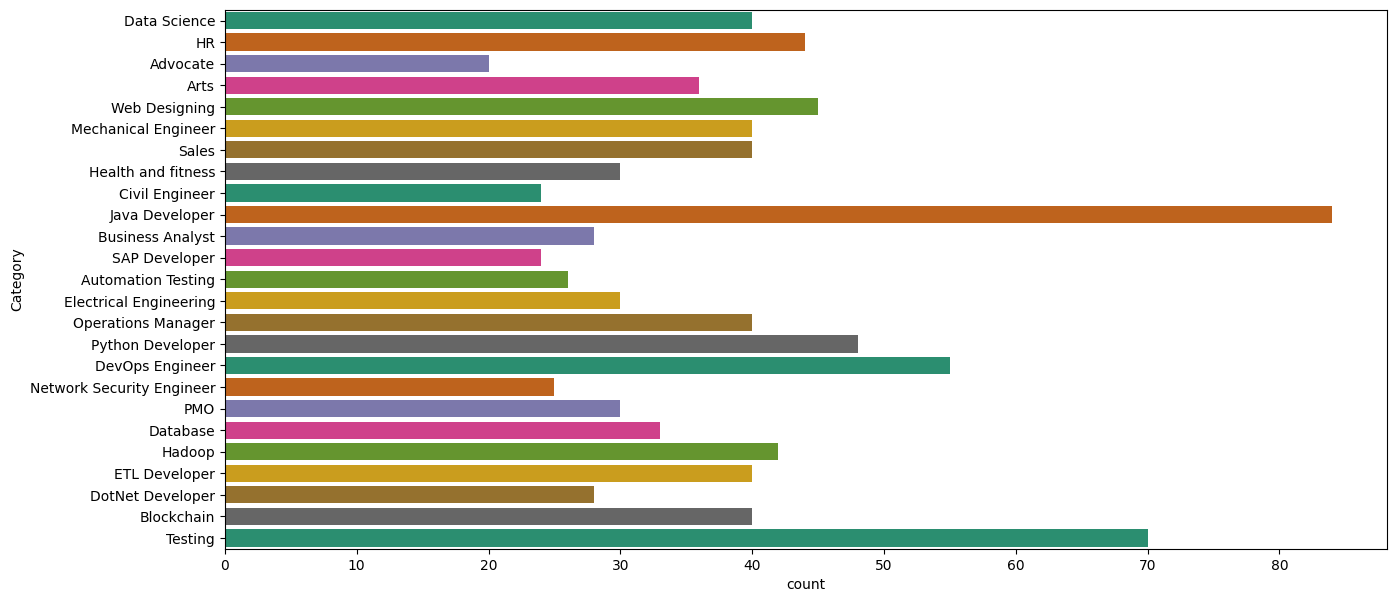

In [7]:
plt.figure(figsize=(15, 7))
sns.countplot(df['Category'], palette='Dark2')
# plt.xticks(rotation=90) in case of vetrical bars and labels are confused
plt.show()

In [8]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

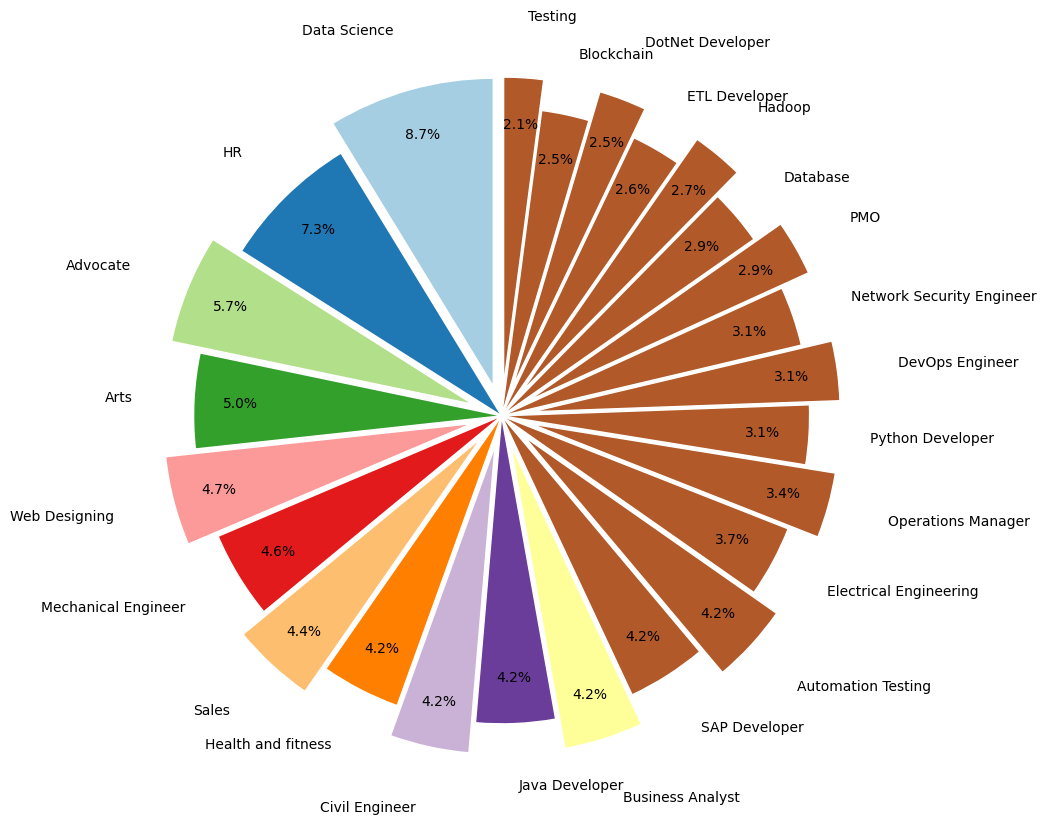

In [9]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()

plt.figure(figsize=(15, 10))
colors = plt.cm.Paired(range(len(labels)))

# Exploding some of the slices slightly for emphasis
explode = [0.1 if i % 2 == 0 else 0 for i in range(len(labels))]

# Plotting the pie chart
plt.pie(
    counts, 
    labels=labels, 
    autopct='%1.1f%%',       # Show percentages with one decimal place
    startangle=90,           # Rotate chart so it starts at the top
    colors=colors, 
    explode=explode,         # Slightly separate some slices
    labeldistance=1.2,       # Position labels further from the center
    pctdistance=0.85,        # Position percentage labels closer to the center of each slice
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},  # Outline slices
    textprops={'fontsize': 10}  # Adjust text size for readability
)
plt.show()

## Exploring Resume

In [10]:
df['Category'][0]

'Data Science'

In [11]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

## Data Cleaning
##### 1. URLs
##### 2. Hashtags
##### 3. Mentions
##### 4. Special Characters
##### 5. Punctuation

In [12]:
import re
def clean_resume(text):
    cleaned_text = re.sub('http\S+\s', ' ', text)
    cleaned_text = re.sub('@\S+', ' ', cleaned_text)
    cleaned_text = re.sub('#\S+\s', ' ', cleaned_text)
    cleaned_text = re.sub('RT|CC', ' ', cleaned_text)
    cleaned_text = re.sub('[%s]' % re.escape("""!#$%^&*_.-+~`"<=>/\|[]{};:@()?',"""), ' ', cleaned_text)
    cleaned_text = re.sub(r'[^\x00-\x7f]', ' ', cleaned_text) # replace Emojis and matches any character not in the ASCII rang
    cleaned_text = re.sub('\s+', ' ', cleaned_text)
    return cleaned_text

In [13]:
df['Resume'] = df['Resume'].apply(lambda x: clean_resume(x))

In [14]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating the

## Word Into Categorical Values

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [17]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to accept the challenges Positive...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [18]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

## Vectorization

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
required_text = tfidf.transform(df['Resume'])

## Splitting Data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(required_text, df['Category'], test_size=0.2, random_state=42)

In [22]:
X_train.shape

(769, 7339)

In [23]:
X_test.shape

(193, 7339)

## Model Creation

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

The ***sklearn.multiclass*** module in Scikit-Learn provides tools for handling ***multi-label*** and ***multi-class*** classification problems. 
These tools allow you to train classifiers that can work with ***more than two classes*** or predict multiple labels simultaneously.
***OneVsRestClassifier***: This strategy trains a separate binary classifier for each class in a multi-class problem.

In [25]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print(accuracy_score(y_test, y_predict))

0.9844559585492227


## Prediction System

In [26]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [27]:
my_resume = """Name: Alex Johnson
Contact: alex.johnson@example.com | (555) 123-4567 | LinkedIn: linkedin.com/in/alexjohnson

Objective:
Data Scientist with 4+ years of experience in predictive modeling, data processing, and machine learning. Passionate about leveraging data to solve complex business problems.

Experience:
- **Data Scientist** | XYZ Analytics | San Francisco, CA | Jan 2021 - Present
    - Developed machine learning models for predicting customer churn, reducing churn by 15%.
    - Analyzed A/B test results to optimize product features, increasing user engagement by 20%.
    - Used Python, R, and SQL for data preprocessing, model building, and data visualization.

- **Data Analyst** | ABC Corp | New York, NY | Jun 2018 - Dec 2020
    - Built dashboards and automated reports for executive team using Tableau and Power BI.
    - Implemented data cleaning procedures, improving data accuracy by 30%.
    - Conducted statistical analysis on sales data to identify trends and potential revenue growth.

Education:
- M.S. in Data Science | University of California, Berkeley | 2018
- B.S. in Statistics | University of Michigan | 2016

Skills:
- Programming Languages: Python, R, SQL
- Machine Learning: Scikit-Learn, TensorFlow, Keras
- Data Visualization: Tableau, Power BI, Matplotlib, Seaborn
- Tools: Jupyter Notebooks, Git, Docker
"""

In [28]:
# load trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# clean the input resume
cleaned_resume = clean_resume(my_resume)

# Transform the cleaned resume usint TF-IDF Vectorizer
input_features = tfidf.transform([cleaned_resume])

# make predictions using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to Category Name
category_mapping = {
    6: 'Data Science', 
    12: 'HR', 
    0: 'Advocate', 
    1: 'Arts', 
    24: 'Web Designing',
    16: 'Mechanical Engineer',
    22: 'Sales',
    14: 'Health and fitness',
    5: 'Civil Engineer',
    15: 'Java Developer',
    4: 'Business Analyst',
    21: 'SAP Developer',
    2: 'Automation Testing',
    11: 'Electrical Engineering',
    18: 'Operations Manager',
    20: 'Python Developer',
    8: 'DevOps Engineer',
    17: 'Network Security Engineer',
    19: 'PMO',
    7: 'Database',
    13: 'Hadoop',
    10: 'ETL Developer',
    9: 'DotNet Developer',
    3: 'Blockchain',
    23: 'Testing'
}

category_name = category_mapping.get(prediction_id, 'Unknown')
print('Predicted Category: ', category_name)

Predicted Category:  Data Science
